# Create Recommender Engine

*What is a recommender engine?*

A recommender engine is an information filtering system that predicts a user's preferences for a set of items (such as products, movies, or music) based on their previous interactions with those items or similar items, and provides personalized recommendations for new items.

This recommender engine takes in a *seed track* and outputs track recommendations based on *similarity measures*

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
np.random.seed(42)

In [ ]:
# Mount GDrive folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set home directory
import os
home_dir = "/content/drive/MyDrive/Eskwelabs/"
os.chdir(home_dir)

## 1. Read the recommendation pool

In [ ]:
# read data
seed_pool_df = pd.read_csv("playlists/reco_pool/spotify_seed_tracks.csv")
seed_pool_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,predicted_genre_id,predicted_genre
0,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,275420,2021-05-16,64,0.561,0.651,...,1,0.0689,0.3090,0.000000,0.3780,0.355,129.957,275420,2,jazz
1,1o6uF8VmXna99ysHTcQRI2,GENTO,3g7vYcdDXnqnDKYFwqXBJP,SB19,3cxdpO2eZx2VT2OWyca18o,232621,2023-05-19,72,0.799,0.701,...,1,0.0826,0.0293,0.000033,0.1870,0.283,95.019,232622,3,rap
2,0QQoU68nnBRWJqr9ak3mnS,MAPA (Band Version),3g7vYcdDXnqnDKYFwqXBJP,SB19,63OIQhMqDpmCRZO0d8Phfu,270411,2021-06-27,55,0.552,0.394,...,0,0.0326,0.4190,0.000000,0.3870,0.487,126.915,270411,4,rock
3,5QZw4F3N3PvuKNKHm9L20b,Bazinga,3g7vYcdDXnqnDKYFwqXBJP,SB19,4bieHSYaRSMRAoDF47qfSf,202506,2021-07-22,60,0.869,0.922,...,1,0.0953,0.2060,0.000000,0.8310,0.388,115.034,202507,0,r&b
4,1z50Hub2XCsAPWo8zgoePu,WYAT (Where You At),3g7vYcdDXnqnDKYFwqXBJP,SB19,2KNLbEBtNGRbVGXH74zOcW,218461,2022-09-02,60,0.778,0.790,...,0,0.0670,0.1850,0.000000,0.1270,0.783,116.986,218462,0,r&b
5,16GGH8OF6LiSUTTbm8421f,I WANT YOU,3g7vYcdDXnqnDKYFwqXBJP,SB19,7svCelXfTenSbzFXKj3zGF,223339,2023-06-09,66,0.674,0.681,...,1,0.0464,0.2290,0.000000,0.0436,0.683,127.942,223340,2,jazz
6,2WUhR1SraSy0SVIQKohJb6,Hanggang Sa Huli,3g7vYcdDXnqnDKYFwqXBJP,SB19,4JlsfnNH8MCDXR0ypy1zcm,254469,2020-07-31,60,0.539,0.553,...,1,0.0276,0.7020,0.000000,0.2050,0.192,132.045,254469,4,rock
7,5Gm6YoDs8N2WznOpASSB5P,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,189100,2019-07-19,0,0.704,0.944,...,0,0.0420,0.4230,0.000000,0.1320,0.913,125.996,189100,4,rock
8,4sYZHEiueAYM5klpUbVNyk,What?,3g7vYcdDXnqnDKYFwqXBJP,SB19,18g914rk7rcJP0o4uhz8uE,270192,2021-03-09,56,0.561,0.856,...,0,0.1900,0.0575,0.000000,0.0728,0.507,95.975,270192,2,jazz
9,3fNpKcMrEDrnjahY9kN5fQ,Alab (Burning),3g7vYcdDXnqnDKYFwqXBJP,SB19,3twC225hfx6FrfrGAO3zvF,182750,2019-12-25,45,0.715,0.927,...,1,0.0604,0.0176,0.000000,0.3400,0.792,119.974,182750,0,r&b


In [ ]:
# read data
rec_pool_df = pd.read_csv("playlists/top_200_tracks.csv")
rec_pool_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,...,-6.209,1.0,0.0454,0.1960,0.000000,0.0830,0.301,174.152,2,jazz
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,87,0.358,0.557,...,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.494,85.043,1,electronic
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,...,-5.599,1.0,0.0338,0.4140,0.000000,0.1110,0.661,95.010,2,jazz
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,...,-8.821,1.0,0.0307,0.0970,0.002720,0.1150,0.296,90.000,4,rock
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,...,-6.126,1.0,0.0800,0.3380,0.000000,0.0975,0.447,100.048,3,rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,1qzvzPfqzpNQ01ZBOEkVlf,Yawn,7nqOGRxlXj7N2JYbgNEjYH,SEVENTEEN,1rE0Gy69MFUh4GuXafWd0f,258213,2023-10-23,0,0.443,0.426,...,-6.607,1.0,0.0298,0.5110,0.000003,0.3050,0.402,171.907,4,rock
4991,6n5M2Al3QgTScpO4AZH9OI,Diamond Days,7nqOGRxlXj7N2JYbgNEjYH,SEVENTEEN,1rE0Gy69MFUh4GuXafWd0f,205866,2023-10-23,0,0.811,0.804,...,-3.115,1.0,0.0855,0.0863,0.000000,0.2450,0.695,115.031,0,r&b
4992,1fRLcqxVwpzpua8E6Se2sN,MY THANG (GO GETTA 2),4O19i2jHEjPyz17BeiwbDp,O SIDE MAFIA,2iLm8scmBP9VcNixtMIf4G,190660,2023-10-20,55,0.975,0.693,...,-5.973,1.0,0.1060,0.0463,0.000001,0.0670,0.939,107.002,2,jazz
4993,6Es0Sxn1yE7L0T1YxrYHKX,Headliner,7nqOGRxlXj7N2JYbgNEjYH,SEVENTEEN,1rE0Gy69MFUh4GuXafWd0f,189813,2023-10-23,0,0.483,0.723,...,-3.488,1.0,0.0337,0.1610,0.000000,0.0744,0.372,175.976,4,rock


In [ ]:
# read data
daily_charts = pd.read_csv("/content/drive/MyDrive/Eskwelabs_C12/Sprint3/daily_charts/ph_spotify_daily_charts_10_23.csv")
daily_charts

,date,position,track_id,track_name,artist,streams,Unnamed: 0
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,NaN
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,NaN
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,NaN
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,NaN
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,NaN
...,...,...,...,...,...,...,...
497393,2023-10-23,196,7rRpt0FcGdDxyhiFcSlswH,Maria Hiwaga,Sassa Gurl,78243,195.0
497394,2023-10-23,197,63bmIgH9sS6sX5Sc7MetGq,Habang Buhay,Zack Tabudlo,77952,196.0
497395,2023-10-23,198,0ll8uFnc0nANY35E0Lfxvg,Somewhere Only We Know,Keane,77845,197.0
497396,2023-10-23,199,029wtk4SD7qKs63ulhgtUc,Don't Play With Us,"OLG Zak, Realest Cram, ENZO MF",77087,198.0


## 2. Input Seed Track


The **seed track** is the track that will serve as input to the recommender engine. The recommender engine will attempt to generate recommendations from the pool based on their similarity to the seed track.

>Q: Pick a track of choice and use this as seed track

In [ ]:
seed_track_data = seed_pool_df[seed_pool_df['track_name']=="Bazinga"].iloc[0]
seed_track_data#[feature_cols]

NameError: ignored

## 3. Explore Similarity Measures

We will use 3 similarity measures for our recommender engine. These are usually expressed as a distance metric. The smaller these quantities are, the closer the two points are.

**Euclidean distance**- It is the straight-line distance between two points in Euclidean space. In other words, it is the length of the shortest path between two points in a straight line. It is calculated as the square root of the sum of the squared differences between each corresponding dimension of the two points.

**Manhattan distance**- It is also known as taxicab distance or L1 distance. It measures the distance between two points by summing the absolute differences between each corresponding dimension of the two points. It represents the distance between two points as if a person were walking on the streets of Manhattan, where the shortest path between two points is always a right-angled path.

**Cosine distance**- It measures the cosine of the angle between two vectors in a high-dimensional space. It calculates the similarity between two vectors rather than the distance. It is often used to compare the similarity between text documents or to determine the similarity between two images.

In [ ]:
# Audio feature cols
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
# Genre probability cols
genre_proba_cols = [col for col in rec_pool_df.columns if col.startswith('genre_')]

Compute distances

In [ ]:
def get_distances(x,y):
    euclidean_dist =  euclidean_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    manhattan_dist =  manhattan_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    cosine_dist = 1 - cosine_similarity(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    return [euclidean_dist,manhattan_dist,cosine_dist]

In [ ]:
rec_pool_df['all_distances_features'] = rec_pool_df.apply(lambda x: get_distances(x[feature_cols],\
                                                                           seed_track_data[feature_cols]), axis=1)

In [ ]:
dist_feature_cols = ['euclidean_dist_features','manhattan_dist_features', 'cosine_dist_features']
rec_pool_df[dist_feature_cols] = rec_pool_df['all_distances_features'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,...,0.00000,0.0830,0.301,174.152,2,jazz,"[79.17653059291693, 82.41193329999999, 2.62390...",79.176531,82.411933,0.000026
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,87,0.358,0.557,...,0.00000,0.0902,0.494,85.043,1,electronic,"[10.706438889337067, 15.352133299999998, 0.001...",10.706439,15.352133,0.001238
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,...,0.00000,0.1110,0.661,95.010,2,jazz,"[2.0767935696903526, 3.1195333000000005, 0.000...",2.076794,3.119533,0.000238
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,...,0.00272,0.1150,0.296,90.000,4,rock,"[7.242380901219835, 10.695286700000004, 0.0017...",7.242381,10.695287,0.001788
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,...,0.00000,0.0975,0.447,100.048,3,rap,"[5.638073580675458, 8.209833299999996, 0.00027...",5.638074,8.209833,0.000277


View histograms of the 3 similarity measures

array([[<Axes: title={'center': 'euclidean_dist_features'}>,
        <Axes: title={'center': 'manhattan_dist_features'}>],
       [<Axes: title={'center': 'cosine_dist_features'}>, <Axes: >]],
      dtype=object)

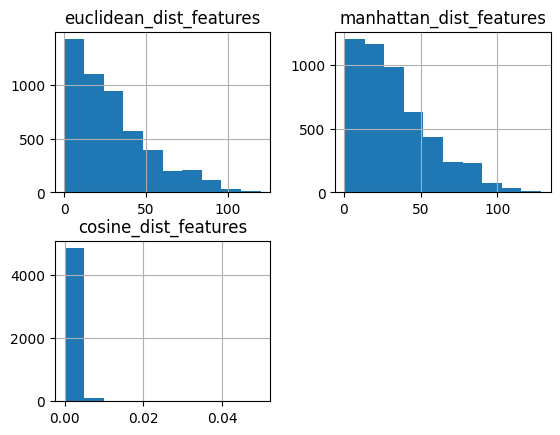

In [ ]:
rec_pool_df[dist_feature_cols].hist()

## 4. Build engine and generate recommendations

 - We will output recommended tracks based on the seed track using the following recommender engine builds

    - Build 1. Audio features only
    - Build 2. Audio features and with same predicted genre
    - Build 3. Predicted genre probabilities only
    - Build 4. Audio features and predicted genre probabilities

##### 4.1. Build 1 - Use audio features only
4.1.1. Euclidean distance

In [ ]:
cols = [col for col in rec_pool_df.columns]
df = pd.DataFrame(columns=cols)

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','euclidean_dist_features','predicted_genre']]
master_rec_df = pd.concat([df,recommendation_df], ignore_index=True)

4.1.2. Manhattan distance

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','manhattan_dist_features','predicted_genre']]
master_rec_df =  pd.concat([master_rec_df,recommendation_df], ignore_index=True)

4.1.3. Cosine distance

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]
master_rec_df =  pd.concat([master_rec_df,recommendation_df], ignore_index=True)

In [ ]:
master_rec_df.sort_values(by='popularity')

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features
14,2j2fIJGh4PMdXt9ULI5Tlc,Dura,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,54VmokqtItjmIaX8yDCse3,200480,2018-01-18,0,0.786,0.846,...,0.000000,0.4130,0.819,95.005,2,jazz,"[0.632634571540065, 1.2468333000000102, 2.2121...",0.632635,1.246833,0.000022
1,5y69gQtK33qxb8a24ACkCy,A Thousand Miles,5ILrArfIV0tMURcHJN8Q07,Vanessa Carlton,7D6BFTArx2ajtkKRVXIKO2,237493,2002-04-30,0,0.559,0.845,...,0.000000,0.1640,0.304,94.915,4,rock,"[0.4478195854487808, 1.0364332999999992, 1.061...",0.447820,1.036433,0.000011
23,07s9NNOT0sZQp7TyolLLgu,Own It (feat. Ed Sheeran & Burna Boy),2SrSdSvpminqmStGELCSNd,Stormzy,4H9xdaXSMCiT7xyBBxiT0Q,216706,2019-11-22,0,0.817,0.781,...,0.000005,0.1230,0.359,104.000,0,r&b,"[9.00031860587119, 9.843348089999994, 3.138265...",9.000319,9.843348,0.000003
21,30mCoJIAVtCfEy7VJ3DG5q,Dynamite - Midnight Remix,3Nrfpe0tUJi4K4DXYWgMUX,BTS,3qIVLJciUAM589Lb5aPEYn,196509,2020-09-18,0,0.782,0.795,...,0.000000,0.1090,0.402,114.036,0,r&b,"[19.026185863727626, 19.967033299999997, 2.968...",19.026186,19.967033,0.000003
28,69bp2EbF7Q2rqc5N3ylezZ,Sorry,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,7fZH0aUAjY3ay25obOUf2a,200786,2015-11-13,0,0.654,0.760,...,0.000000,0.2990,0.410,99.945,0,r&b,"[4.9322240339534575, 5.522033299999988, 3.8640...",4.932224,5.522033,0.000004
11,5y69gQtK33qxb8a24ACkCy,A Thousand Miles,5ILrArfIV0tMURcHJN8Q07,Vanessa Carlton,7D6BFTArx2ajtkKRVXIKO2,237493,2002-04-30,0,0.559,0.845,...,0.000000,0.1640,0.304,94.915,4,rock,"[0.4478195854487808, 1.0364332999999992, 1.061...",0.447820,1.036433,0.000011
6,2j2fIJGh4PMdXt9ULI5Tlc,Dura,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,54VmokqtItjmIaX8yDCse3,200480,2018-01-18,0,0.786,0.846,...,0.000000,0.4130,0.819,95.005,2,jazz,"[0.632634571540065, 1.2468333000000102, 2.2121...",0.632635,1.246833,0.000022
10,4Z3qm2aWGTJuJKnv3EWwyD,Hide Away,6Dd3NScHWwnW6obMFbl1BH,Daya,2cE2eOy7alOZHpuelJEV8Q,192386,2017-01-06,4,0.886,0.818,...,0.000003,0.0687,0.469,95.050,3,rap,"[0.32931059942056035, 0.7747298399999916, 5.92...",0.329311,0.774730,0.000006
0,4Z3qm2aWGTJuJKnv3EWwyD,Hide Away,6Dd3NScHWwnW6obMFbl1BH,Daya,2cE2eOy7alOZHpuelJEV8Q,192386,2017-01-06,4,0.886,0.818,...,0.000003,0.0687,0.469,95.050,3,rap,"[0.32931059942056035, 0.7747298399999916, 5.92...",0.329311,0.774730,0.000006
9,0LAh3hfeuUekvLm3Nq6MmA,Love Goes - EDM Version,3g7vYcdDXnqnDKYFwqXBJP,SB19,4JlsfnNH8MCDXR0ypy1zcm,215000,2020-07-31,45,0.718,0.780,...,0.000000,0.3540,0.762,94.977,2,jazz,"[0.7533228398962658, 1.486633300000002, 3.1367...",0.753323,1.486633,0.000031


In [ ]:
artists = master_rec_df['artist_name'].drop_duplicates().tolist()
artists.sort()

In [ ]:
artists

['(G)I-DLE',
 'BTS',
 'Camila Cabello',
 'Daddy Yankee',
 'Daya',
 'Drake',
 'ENHYPEN',
 'Justin Bieber',
 'Lady Gaga',
 'Linkin Park',
 'Marshmello',
 'NF',
 'SB19',
 'Stormzy',
 'Vanessa Carlton',
 'aespa',
 'j-hope']

In [ ]:
# seed track: "Banzinga"
def map_artists(artist):
  if artist in ['Gabriel Valenciano']:
    return 1
  elif artist in ['(G)I-DLE', 'BTS', 'Ed Sheeran', 'GOT the beat', 'IU','IZ*ONE', 'Martin Jensen', 'NCT DREAM', 'Pinkfong', 'Red Velvet - IRENE & SEULGI', 'SEVENTEEN', 'TWICE']:
    return 0
  else:
    return 2

In [ ]:
# seed track: "GENTO"
# def map_artists(artist):
#   if artist in []:
#     return 1
#   elif artist in ['(G)I-DLE','BTS', 'Camila Cabello', 'Daddy Yankee', 'Daya', 'Drake', 'ENHYPEN', 'Justin Bieber', 'Lady Gaga', 'Linkin Park', 'Marshmello', 'NF', 'SB19', 'Stormzy', 'Vanessa Carlton', 'aespa', 'j-hope']:
#     return 0
#   else:
#     return 2

In [ ]:
# seed track: "MAPA"
# def map_artists(artist):
#   if artist in ['Shehyee', 'Yeng Constantino']:
#     return 1
#   elif artist in ['Ariana Grande', 'Bruno Mars', 'Ava Max', 'BLACKPINK', 'Camila Cabello', 'Justin Bieber', 'Kygo', 'NF', 'Taylor Swift','The Weeknd']:
#     return 0
#   else:
#     return 2

In [ ]:
master_rec_df['opm'] = master_rec_df['artist_name'].apply(map_artists)

In [ ]:
daily_charts.columns

Index(['date', 'position', 'track_id', 'track_name', 'artist', 'streams',
       'Unnamed: 0', 'total_streams'],
      dtype='object')

In [ ]:
daily_charts['total_streams'] = daily_charts.groupby(['track_id', 'track_name', 'artist'])['streams'].transform('sum')

In [ ]:
def map_streams(track):
    if track in daily_charts['track_name'].values:
        return daily_charts[daily_charts['track_name'] == track]['total_streams'].values[0]
    else:
        return None

master_rec_df['streams'] = master_rec_df['track_name'].apply(map_streams)

In [ ]:
master_rec_df.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'predicted_genre_id', 'predicted_genre', 'all_distances_features',
       'euclidean_dist_features', 'manhattan_dist_features',
       'cosine_dist_features', 'opm', 'streams'],
      dtype='object')

In [ ]:
master_rec_df[master_rec_df['opm']==1].sort_values(by='popularity')[['artist_name','track_name','predicted_genre','popularity','streams']]

,artist_name,track_name,predicted_genre,popularity,streams


In [ ]:
master_rec_df[master_rec_df['opm']==0].sort_values(by='popularity')[['artist_name','track_name','predicted_genre','popularity','streams']]

,artist_name,track_name,predicted_genre,popularity,streams
14,Daddy Yankee,Dura,jazz,0,504471.0
1,Vanessa Carlton,A Thousand Miles,rock,0,12277513.0
23,Stormzy,Own It (feat. Ed Sheeran & Burna Boy),r&b,0,53430.0
21,BTS,Dynamite - Midnight Remix,r&b,0,35634.0
28,Justin Bieber,Sorry,r&b,0,547041.0
11,Vanessa Carlton,A Thousand Miles,rock,0,12277513.0
6,Daddy Yankee,Dura,jazz,0,504471.0
10,Daya,Hide Away,rap,4,725449.0
0,Daya,Hide Away,rap,4,725449.0
9,SB19,Love Goes - EDM Version,jazz,45,26320.0


In [ ]:
seed_pool_df['streams'] = seed_pool_df['track_name'].apply(map_streams)
seed_pool_df[['track_name','streams']]

,track_name,streams
0,MAPA,28411613.0
1,GENTO,14703248.0
2,MAPA (Band Version),7146034.0
3,Bazinga,2378357.0
4,WYAT (Where You At),965975.0
5,I WANT YOU,832865.0
6,Hanggang Sa Huli,624990.0
7,Go Up,533986.0
8,What?,527582.0
9,Alab (Burning),485997.0


##### 4.2. Build 2 - Audio features and with same predicted genre

In [ ]:
recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [rec_pool_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

<ipython-input-16-3a4dfb00342b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
50,0W4NhJhcqKCqEP2GIpDCDq,Love,Keyshia Cole,0.000005,jazz
223,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,0.000008,jazz
196,6HU7h9RYOaPRFeh0R3UeAr,deja vu,Olivia Rodrigo,0.000008,jazz
47,1kuGVB7EU95pJObxwvfwKS,vampire,Olivia Rodrigo,0.000011,jazz
1,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,0.000013,jazz
105,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,Bruno Mars,0.000014,jazz
174,4T2OcY96txiAue0LWtmN43,Thai Freestyle,Tu$ Brother$,0.000026,jazz
86,3fBbfrWZUuWWrMQXFISr7N,New Flame (feat. Usher & Rick Ross),Chris Brown,0.000031,jazz
59,7CrpqsFrk3PdqMFSW7nlDV,3 AM,Baby Blood,0.000046,jazz
13,01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow),Jung Kook,0.000054,jazz


##### 4.3. Build 3 - Predicted genre probabilities

In [ ]:
rec_pool_df['all_distances_proba'] = rec_pool_df.apply(lambda x: get_distances(x[genre_proba_cols],\
                                                                           seed_track_data[genre_proba_cols]), axis=1)

In [ ]:
dist_proba_cols = ['euclidean_dist_proba','manhattan_dist_proba', 'cosine_dist_proba']
rec_pool_df[dist_proba_cols] = rec_pool_df['all_distances_proba'].apply(pd.Series)
rec_pool_df.head()

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_proba')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_proba','predicted_genre']]

##### 4.4. Build 4 - Audio features and predicted genre probabilities

In [ ]:
cols = feature_cols + genre_proba_cols
rec_pool_df['all_distances_all'] = rec_pool_df.apply(lambda x: get_distances(x[cols],\
                                                                           seed_track_data[cols]), axis=1)

In [ ]:
dist_all_cols = ['euclidean_dist_all','manhattan_dist_all', 'cosine_dist_all']
rec_pool_df[dist_all_cols] = rec_pool_df['all_distances_all'].apply(pd.Series)
rec_pool_df.head()

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_name','artist_name','cosine_dist_all','predicted_genre']]

In [ ]:
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_all','predicted_genre']]

## 5. Output recommendations
Pick an approach, get the track_id list, and plug in next notebook to deploy as a playlist in Spotify

In [ ]:
recommendation_df['track_id'].values